<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/main/Tasca_M3_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exercise 1

Download the data set Airlines Delay: Airline on-time statistics and delay causes and load it into a Pandas Dataframe. Explore the data it contains, briefly explain which variables are there and stick only to the columns you consider relevant. Justify your choice.

### Important

The dimension of the dataset must be randomly reduced in order to obtain a 200,000 record only version. All exercises should be done on this reduced dataset.

### Airline Dataset Variables description:

A search about technical terms was made in order to understand the data. Below follows a table with the Airline Dataset Variables definition.


IATA:  International Air Transport Association\
NAS : National Aviation System\
Carrier: an organization transporting passengers and cargo by aircraft \
Delay causes:
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
 -LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.



| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64  
| 1 | Year | year of the flight | int64  
| 2 | Month | month of the flight | int64  
| 3 | DayofMonth| day of the month (1 to 31) | int64  
| 4 | DayOfWeek| day of the week 1 (Monday) - 7 (Sunday)| int64  
| 5 | DepTime| actual departure time (local, hhmm) |float64
| 6 | CRSDepTime| scheduled departure time (local, hhmm | int64  
| 7 | ArrTime |  actual arrival time (local, hhmm) |float64
| 8 | CRSArrTime | scheduled arrival time (local, hhmm) |int64  
| 9 | UniqueCarrier | carrier ID:a four-character unique identifier that is assigned by the CBSA to identify a carrier |object 
| 10 | FlightNum | flight number | int64  
| 11 | TailNum| plane tail number: an alphanumeric code between two and six characters in length used to identify a specific airplane | object |
| 12 | ActualElapsedTime| actual elapsed time of the flight, in minutes |float64
| 13 | CRSElapsedTime | scheduled elapsed time of the flight, in minutes   | float64
| 14 | AirTime | airborne time for the flight, in minutes | float64
| 15 | ArrDelay | arrival delay, in minutes | float64
| 16 | DepDelay | departure delay, in minutes |  float64|
| 17 | Origin| origin IATA airport code | object 
| 18 | Dest  | destination IATA airport code | object 
| 19 | Distance |Distance between airports (miles) | int64  
| 20 | TaxiIn | taxi time from wheels down to arrival at the gate, in minutes | float64
| 21 | TaxiOut| taxi time from departure from the gate to wheels up, in minutes | float64
| 22 | Cancelled  | cancellation status (0 , 1 where 1 is TRUE) | int64  
| 23 | CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |object |
| 24 | Diverted| diversion status (0 , 1 where 1 is TRUE) | int64  
| 25 | CarrierDelay| in minutes | float64
| 26 | WeatherDelay| in minutes | float64
| 27 | NASDelay | in minutes | float64
| 28 | SecurityDelay| in minutes | float64
| 29 | LateAircraftDelay| in minutes |float64


---
Columns NOT considered relevant are:

| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64 |







Import libraries and configure sample. Drop column 'Unnamed'. Print dataset info and display sample

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import norm

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))

df = df.sample(n=200000)

df.drop(df.columns[[0]], axis=1, inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
70361,2008,1,2,3,950.0,810,1310.0,1134,UA,356,...,6.0,9.0,0,N,0,96.0,0.0,0.0,0.0,0.0
576195,2008,4,4,5,1513.0,1440,1653.0,1625,WN,3220,...,3.0,7.0,0,N,0,0.0,0.0,0.0,0.0,28.0
895914,2008,6,12,4,1555.0,1525,1714.0,1625,WN,3744,...,7.0,16.0,0,N,0,30.0,0.0,19.0,0.0,0.0
964439,2008,6,1,7,1526.0,1515,1741.0,1731,UA,581,...,3.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
84747,2008,1,8,2,749.0,735,1053.0,1035,US,1257,...,6.0,31.0,0,N,0,14.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540509,2008,3,10,1,818.0,715,1404.0,1305,AA,1542,...,5.0,11.0,0,N,0,59.0,0.0,0.0,0.0,0.0
1192332,2008,7,14,1,1546.0,1510,1804.0,1727,FL,724,...,5.0,11.0,0,N,0,0.0,0.0,1.0,0.0,36.0
1864434,2008,12,18,4,1103.0,1025,1522.0,1435,HA,29,...,6.0,57.0,0,N,0,9.0,38.0,0.0,0.0,0.0
385483,2008,3,13,4,1718.0,1710,1842.0,1820,WN,2266,...,5.0,13.0,0,N,0,0.0,0.0,14.0,0.0,8.0


### - Exercise 2

Do a full dataset report:

    Statistically summarize the dataset and columns of interest. Do a statistical analysis of what you consider relevant.
    Find how much missing data there is per column.
    Create new columns (average flight speed, whether it was late or not...).
    Make a table of the airlines with the most accumulated delays.
    What are the longest flights? And the most delayed? Look for the longest routes and those with the most delays.
    Contribute what you consider relevant.

Create new column average flight speed, in miles per hour. Airtime in minutes must be divided by 60.

In [88]:
df["AvgFlightSpeed"] = df['Distance'] / (df['AirTime']/60)
print(df["AvgFlightSpeed"])

70361      476.160000
576195     376.000000
895914     268.928571
964439     432.946058
84747      377.391304
              ...    
540509     474.285714
1192332    414.098361
1864434    501.265823
385483     275.454545
1212406    473.067729
Name: AvgFlightSpeed, Length: 200000, dtype: float64


In [89]:
print(df['ArrDelay'])

70361      96.0
576195     28.0
895914     49.0
964439     10.0
84747      18.0
           ... 
540509     59.0
1192332    37.0
1864434    47.0
385483     22.0
1212406     7.0
Name: ArrDelay, Length: 200000, dtype: float64


Create new columns'LateDeparture' & 'LateArrival' to check if the flights were delayed more than 15 minutes

In [90]:
def is_Delayed(delayTime):
  if delayTime> 15:
    return True
  else:
    return False
df['LateDeparture'] = df['DepDelay'].apply(is_Delayed)
df['LateArrival'] = df['ArrDelay'].apply(is_Delayed)
print(df['LateDeparture'])
print(df['LateArrival'])
df

70361       True
576195      True
895914      True
964439     False
84747      False
           ...  
540509      True
1192332     True
1864434     True
385483     False
1212406    False
Name: LateDeparture, Length: 200000, dtype: bool
70361       True
576195      True
895914      True
964439     False
84747       True
           ...  
540509      True
1192332     True
1864434     True
385483      True
1212406    False
Name: LateArrival, Length: 200000, dtype: bool


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgFlightSpeed,LateDeparture,LateArrival
70361,2008,1,2,3,950.0,810,1310.0,1134,UA,356,...,N,0,96.0,0.0,0.0,0.0,0.0,476.160000,True,True
576195,2008,4,4,5,1513.0,1440,1653.0,1625,WN,3220,...,N,0,0.0,0.0,0.0,0.0,28.0,376.000000,True,True
895914,2008,6,12,4,1555.0,1525,1714.0,1625,WN,3744,...,N,0,30.0,0.0,19.0,0.0,0.0,268.928571,True,True
964439,2008,6,1,7,1526.0,1515,1741.0,1731,UA,581,...,N,0,NaN,NaN,NaN,NaN,NaN,432.946058,False,False
84747,2008,1,8,2,749.0,735,1053.0,1035,US,1257,...,N,0,14.0,0.0,4.0,0.0,0.0,377.391304,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540509,2008,3,10,1,818.0,715,1404.0,1305,AA,1542,...,N,0,59.0,0.0,0.0,0.0,0.0,474.285714,True,True
1192332,2008,7,14,1,1546.0,1510,1804.0,1727,FL,724,...,N,0,0.0,0.0,1.0,0.0,36.0,414.098361,True,True
1864434,2008,12,18,4,1103.0,1025,1522.0,1435,HA,29,...,N,0,9.0,38.0,0.0,0.0,0.0,501.265823,True,True
385483,2008,3,13,4,1718.0,1710,1842.0,1820,WN,2266,...,N,0,0.0,0.0,14.0,0.0,8.0,275.454545,False,True


Make a table of the airlines with the most accumulated delays. Display size as number of delayed flights and mean of time delay in minutes.

In [91]:
df.groupby('UniqueCarrier').agg(np.size)                 # size() is calculating the count
carrier_delay = df.groupby('UniqueCarrier').agg({'ArrDelay' :[np.size,np.mean]})
                                                                

carrier_delay.sort_values([('ArrDelay','size')], ascending=False).head(20)

ArrDelay           
                  size       mean
UniqueCarrier                    
WN               38933  30.066390
AA               20026  46.416403
MQ               14745  46.011179
UA               14670  47.937248
OO               13560  45.236625
DL               11582  39.688129
XE               10694  50.248427
CO               10194  40.999212
US               10104  36.457720
EV                8559  47.539235
NW                8128  43.894444
FL                7418  43.249763
YV                6902  54.759709
B6                5778  54.426455
9E                5476  47.328306
OH                5411  50.833612
AS                4031  35.760880
F9                2894  27.230876
HA                 809  35.255611
AQ                  86  25.406977

Create table showing top 10 Carriers with number of delayed flights greater than 1000

In [92]:
top_arr_delay = carrier_delay['ArrDelay']['size'] >= 1000       # only variable with sample size >=1000 will be considered 

carrier_delay[top_arr_delay].sort_values([('ArrDelay', 'mean')], ascending=False)[:10]


ArrDelay           
                  size       mean
UniqueCarrier                    
YV                6902  54.759709
B6                5778  54.426455
OH                5411  50.833612
XE               10694  50.248427
UA               14670  47.937248
EV                8559  47.539235
9E                5476  47.328306
AA               20026  46.416403
MQ               14745  46.011179
OO               13560  45.236625

Show number of scheduled departures planned by carriers


In [93]:
carrier_count = df['UniqueCarrier'].value_counts()
carrier_count

WN    38933
AA    20026
MQ    14745
UA    14670
OO    13560
DL    11582
XE    10694
CO    10194
US    10104
EV     8559
NW     8128
FL     7418
YV     6902
B6     5778
9E     5476
OH     5411
AS     4031
F9     2894
HA      809
AQ       86
Name: UniqueCarrier, dtype: int64

Show frequency distribution and percentage of flights by carrier 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


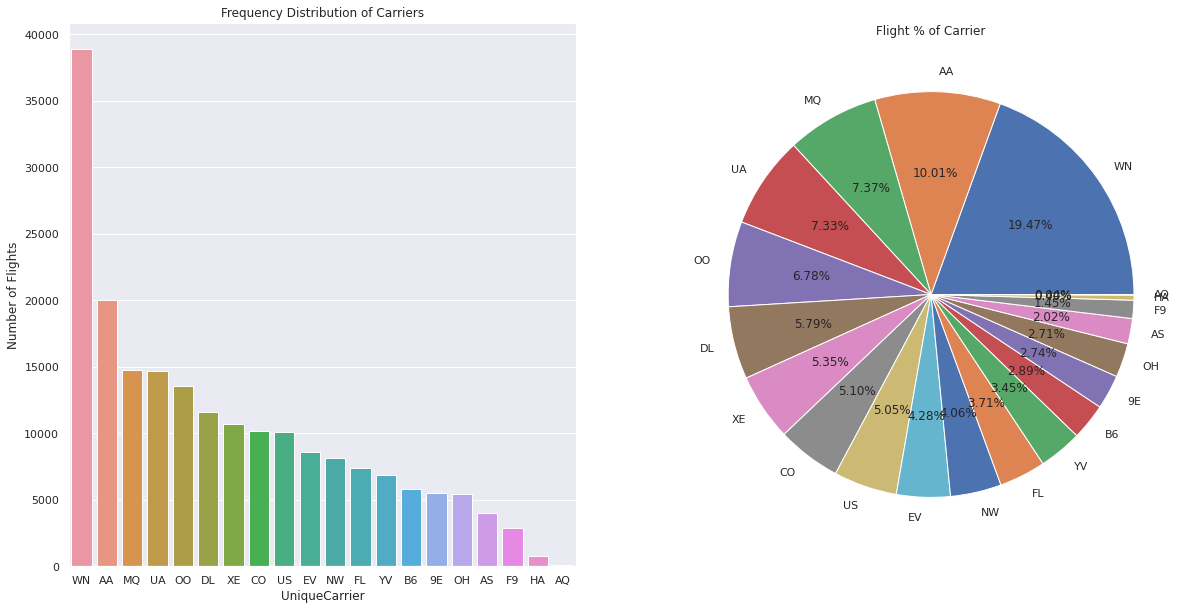

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df['UniqueCarrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('UniqueCarrier',order = df['UniqueCarrier'].value_counts().index, data=df,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()

Show a correlation matrix to help understand the data

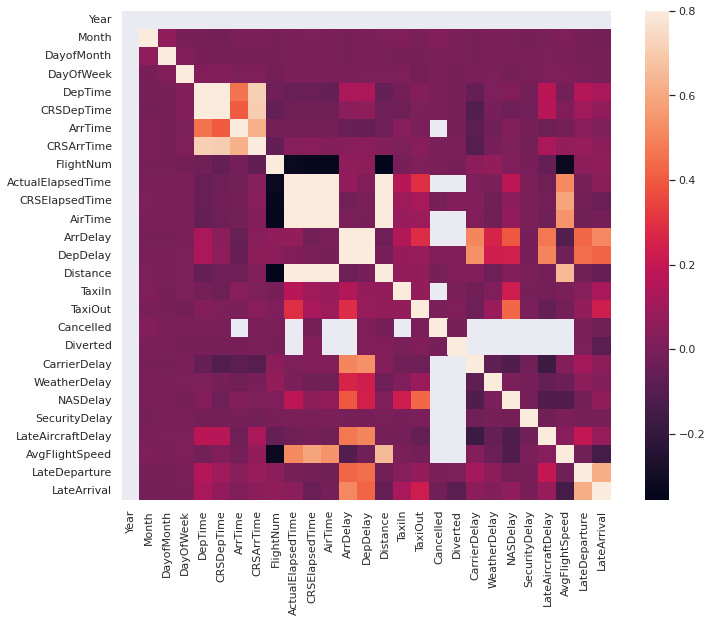

In [95]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()




Through the correlation matrix we can see how some of the 29 variables in the dataset can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.


Convert columns 'Year', 'Month' and 'DayOfMonth' to column 'DepDate' in year/month/date format 

In [96]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

Create five diferent categories named `Status' representing whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

In [97]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4

Drop unwanted data

In [98]:
df = df.drop("Year",1) #Converted to date
df = df.drop("DayofMonth",1) #Converted to date
df = df.drop("DepTime",1) #Of the departure data we only keep the expected 
df = df.drop("DepDelay",1)
df = df.drop("ArrTime",1)
df = df.drop("CRSArrTime",1)
df = df.drop("ActualElapsedTime",1)
df = df.drop("CRSElapsedTime",1)
df = df.drop("Diverted",1)
df = df.drop("Cancelled",1)
df = df.drop("Distance",1)
df = df.drop("FlightNum",1)
df = df.drop("TailNum",1)

<ipython-input-98-01968dfc0712>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Year",1) #Converted to date
<ipython-input-98-01968dfc0712>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DayofMonth",1) #Converted to date
<ipython-input-98-01968dfc0712>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DepTime",1) #Of the departure data we only keep the expected
<ipython-input-98-01968dfc0712>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("DepDelay",1)
<ipython-input-98-01968dfc0712>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 

Display Status plot representing whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


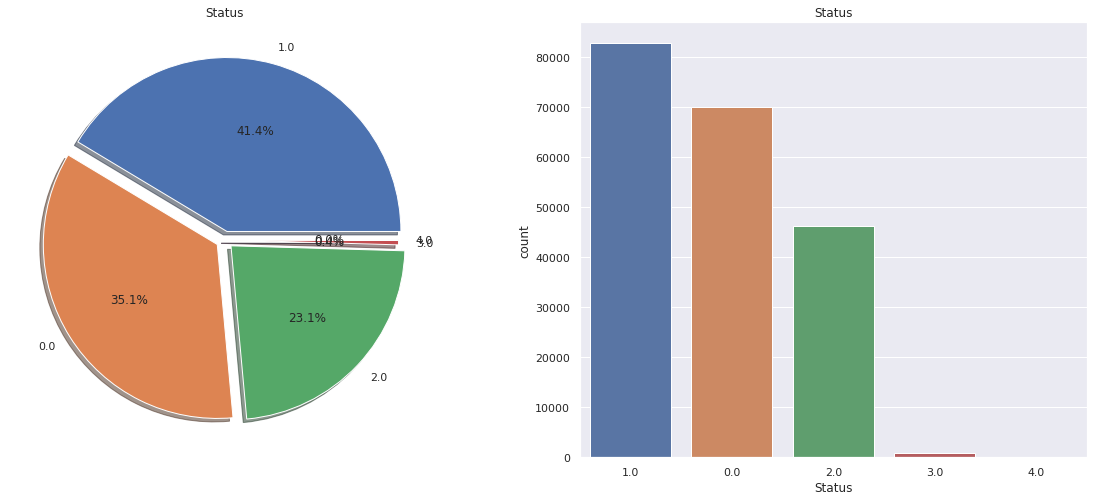

Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [99]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')


64,4% of domestic flights were delayed by more than 15 minutes. 35,8% of them (or 23,1% of total fligths) had delays of more than one hour. Another different interpretation is that 76,5% of flights have delay of one hour or less.
On the other hand, just a 0,03% of flights were cancelled and 0,4% were diverted.

Select delayed flights represented by statuses slightly delayed (1) and highly delayed (2). Plot histogram and print skewness and kurtosis.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


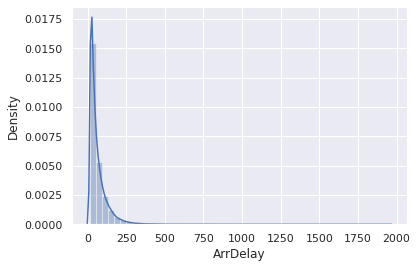

Skewness: 4.235423
Kurtosis: 42.785504


In [100]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

sns.distplot(Delayedflights['ArrDelay'])
plt.show()

#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())



It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short.

Display plot showing average delay by month

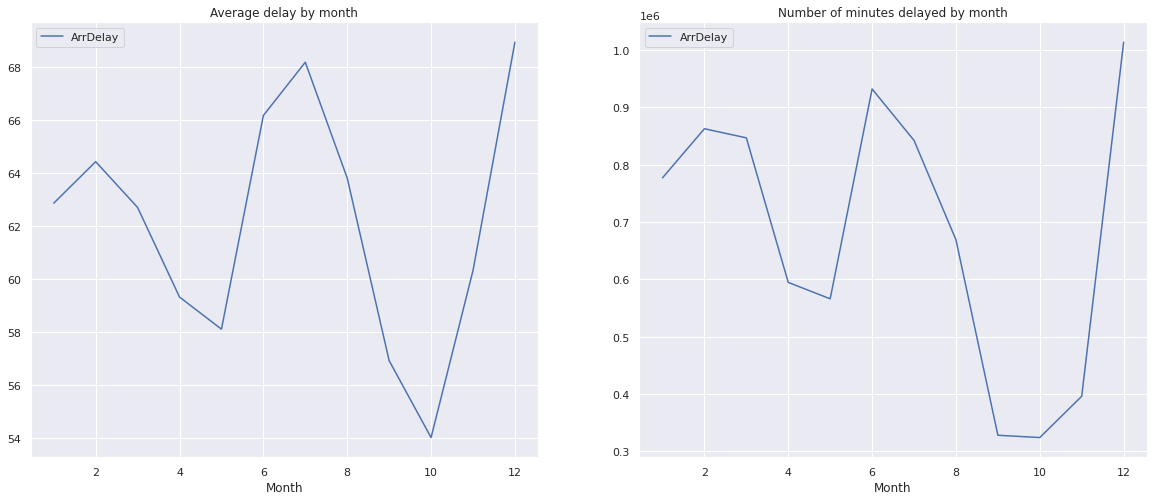

In [101]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

Plot showing Scheduled Departure Time vs Arrival Delay to analyze if hour of the day is relevant. seems that number of delayed flights grows along daytime.

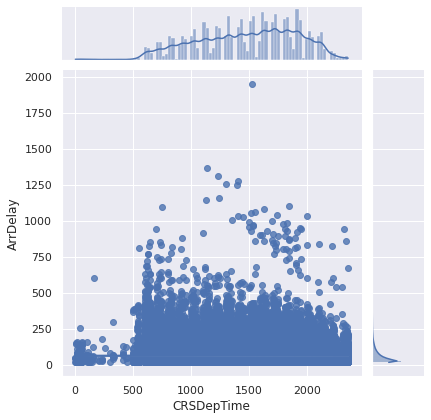

In [102]:
sns.jointplot(x='CRSDepTime',y='ArrDelay',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()


Delays focused on February, June and December, with a peak on average delays on July.




Plot a graph showing causes of delayed flights by month

<ipython-input-103-37fb6fca1c21>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


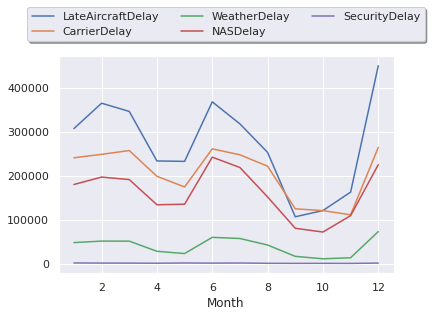

In [103]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

The graph identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay, showing how those three variables create most of delays during the year.

Create a set of scatterplots to analyze correlation between 'ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay'

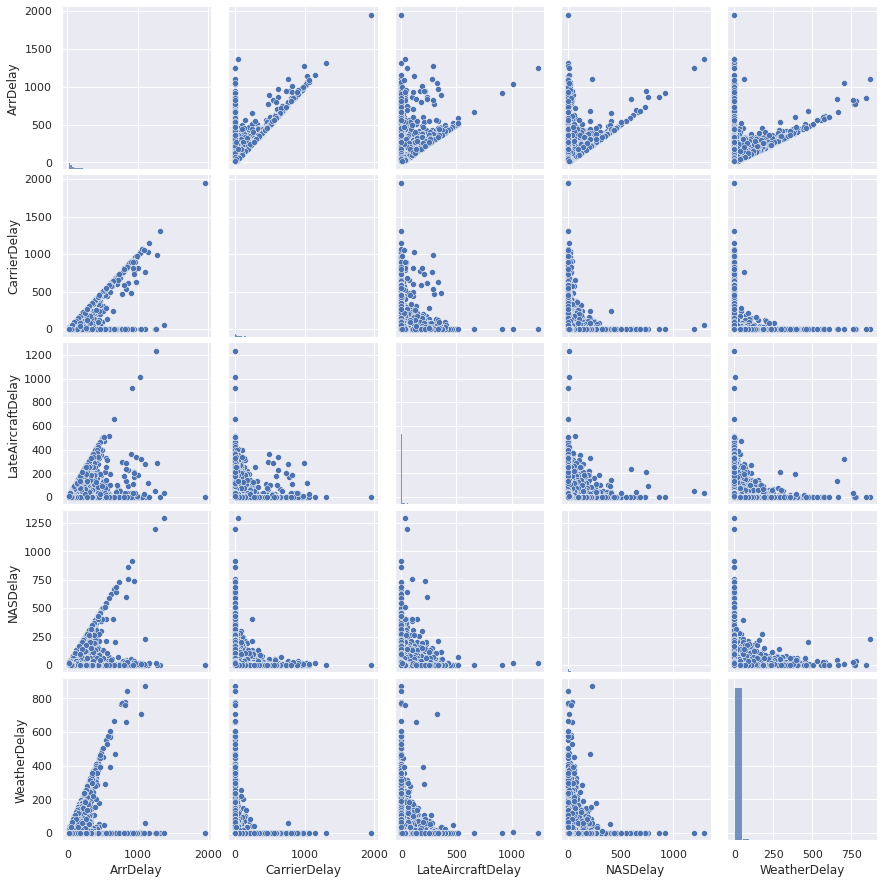

In [104]:
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], height = 2.5)
plt.show()


Late Aircraft Delay seems to be the most important variable as it can be seen in the distribution.

Show number of flghts delayed by carrier

In [105]:
print(df['UniqueCarrier'].value_counts())

WN    38933
AA    20026
MQ    14745
UA    14670
OO    13560
DL    11582
XE    10694
CO    10194
US    10104
EV     8559
NW     8128
FL     7418
YV     6902
B6     5778
9E     5476
OH     5411
AS     4031
F9     2894
HA      809
AQ       86
Name: UniqueCarrier, dtype: int64


Display a plot showing average delay and distribution of delayed flights by carrier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


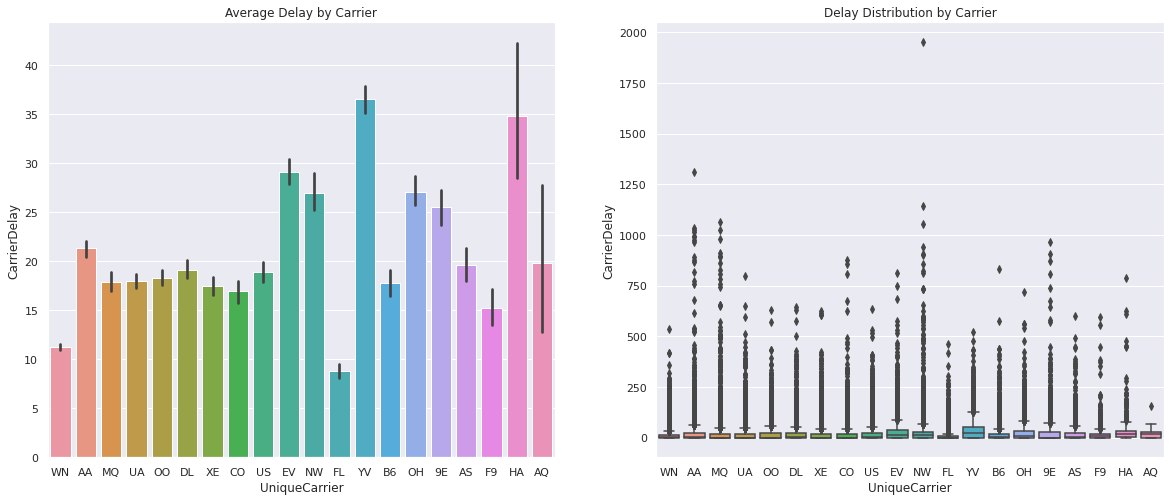

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [106]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])


### - Exercise 3

Export the dataset clean and with the new columns to Excel.

In [107]:
 df.to_csv('mydataframe.csv', sep='\t')

In [108]:
df.to_csv('/content/drive/My Drive/Delayed_Flights_processed.csv', encoding='utf-8', index=False)